In [1]:
import numpy as np

# Set the random seed for reproducibility
np.random.seed(0)

# Generate the first Gaussian distribution
mean1 = [5.5, 5.5]
cov1 = [[1, 0], [0, 1]]
samples1 = 5000
target1 = 0
gaussian1 = np.random.multivariate_normal(mean1, cov1, samples1)
gaussian1 = np.hstack((gaussian1, np.full((samples1, 1), target1)))  # Add target column

# Generate the second Gaussian distribution
mean2 = [13, 13]
cov2 = [[1, 0], [0, 1]]
samples2 = 300
target2 = 1
gaussian2 = np.random.multivariate_normal(mean2, cov2, samples2)
# gaussian2 = np.clip(gaussian2, 12, 15)  # Clip values between 12 and 15
gaussian2 = np.hstack((gaussian2, np.full((samples2, 1), target2)))  # Add target column

# Combine the two distributions and shuffle them
gaussian3 = np.vstack((gaussian1, gaussian2))
np.random.shuffle(gaussian3)

# Save the data as CSV file
np.savetxt('gaussian_data.csv', gaussian3, delimiter=',')

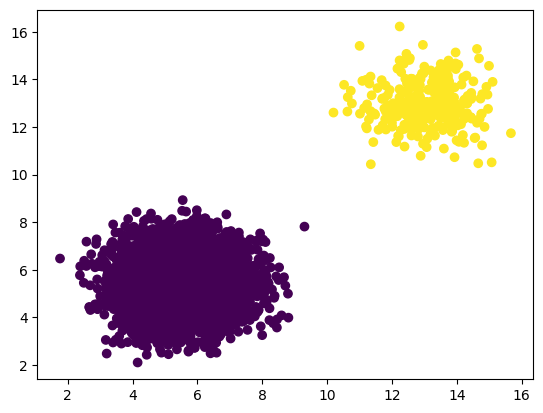

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from the CSV file
data = pd.read_csv('gaussian_data.csv', header=None)
plt.scatter(data[0], data[1], c=data[2])

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[[0, 1]], data[2], test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

from joblib import dump

# Save the model to disk
dump(model, 'gaussian_model.joblib')

['gaussian_model.joblib']

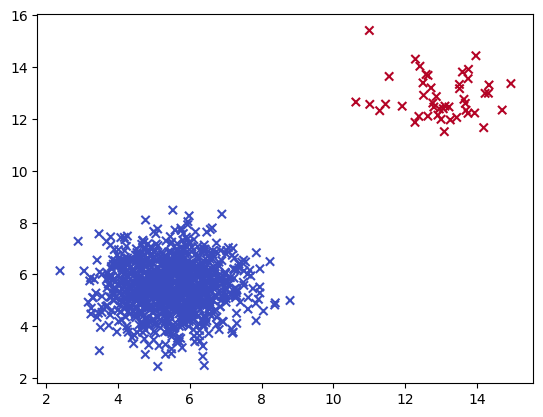

In [4]:
from joblib import load

# Load the model from disk
model = load('gaussian_model.joblib')

# Make predictions

# Predict the class labels for the test set
y_pred = model.predict(x_test)
plot = plt.scatter(x_test[0], x_test[1], c=y_pred, marker='x', cmap='coolwarm')